# NBA PLAYERS 

In [226]:
# importing Libraries
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report


In [227]:
# reading the Data Set
nba_df = pd.read_csv('nba_logreg.csv')

In [228]:
def rem_outlier(col):
    q1 = nba_df[col].quantile(0.25)
    q3 = nba_df[col].quantile(0.75)
    iqr = q3-q1
    nba_df[col] = np.where(nba_df[col] < q1- 1.5*iqr,q1- 1.5*iqr, nba_df[col] )
    nba_df[col] = np.where(nba_df[col] > q3+ 1.5*iqr,q3+ 1.5*iqr, nba_df[col] )  

In [229]:
def evalu(mdl, x, y):
    scores = cross_val_score(mdl, x , y, cv=5, scoring='accuracy')
    return scores.mean(), scores.std()
    

> EDA & DATA PREPROCESSING

In [230]:
nba_df.sample(8)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
527,Mike McGee,39,9.0,4.9,2.1,4.4,46.5,0.0,0.1,0.0,...,1.4,58.5,0.9,0.4,1.3,0.4,0.5,0.1,0.9,1.0
496,Herb Williams,82,27.8,11.5,5.0,10.4,47.7,0.0,0.1,28.6,...,2.3,67.0,2.1,5.2,7.4,1.7,0.7,2.2,1.7,1.0
366,Charles Jones,78,20.1,8.4,3.0,5.8,52.0,0.0,0.1,0.0,...,3.6,64.8,1.8,3.3,5.1,1.6,0.6,0.8,1.8,0.0
156,Michael Smith,65,9.5,5.0,2.1,4.4,47.6,0.0,0.4,7.1,...,1.0,82.8,0.6,0.9,1.5,1.2,0.1,0.0,0.8,0.0
363,Tim McCormick,78,20.3,9.3,3.4,6.2,55.7,0.0,0.0,0.0,...,3.4,71.5,1.9,3.2,5.1,1.0,0.2,0.4,1.5,1.0
1273,Isaiah Rider,79,30.6,16.6,6.6,14.1,46.8,0.7,1.9,36.0,...,3.4,81.1,1.5,2.5,4.0,2.6,0.7,0.3,2.8,1.0
935,Marquis Daniels,56,18.6,8.5,3.6,7.3,49.4,0.2,0.6,30.6,...,1.4,76.9,1.2,1.4,2.6,2.1,0.9,0.2,0.8,1.0
387,Tony Campbell,56,11.2,5.6,2.3,4.7,49.6,0.0,0.0,0.0,...,1.3,80.0,0.7,0.9,1.6,0.4,0.5,0.1,1.2,1.0


In [231]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [232]:
nba_df = nba_df.drop('Name', axis=1)

In [233]:
# Exploring the NULL Values
nba_df[nba_df['3P%'].isnull()]

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
339,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,0.3,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,1.4,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,0.8,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,0.3,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,0.8,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,1.0,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,0.7,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,0.5,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0


In [234]:
# When ever '3PA' is zero the '3P%' is zero aswell and corresponding '3PM' is zero hence the 3P% should be replaced by 0.  
nba_df['3P%'].replace(np.nan, 0, inplace = True)

In [235]:
nba_df.describe().T

,count,mean,std,min,25%,50%,75%,max
GP,1340.0,60.414179,17.433992,11.0,47.000,63.00,77.0,82.0
MIN,1340.0,17.624627,8.307964,3.1,10.875,16.10,22.9,40.9
PTS,1340.0,6.801493,4.357545,0.7,3.700,5.55,8.8,28.2
FGM,1340.0,2.629104,1.683555,0.3,1.400,2.10,3.4,10.2
FGA,1340.0,5.885299,3.593488,0.8,3.300,4.80,7.5,19.8
FG%,1340.0,44.169403,6.137679,23.8,40.200,44.10,47.9,73.7
3P Made,1340.0,0.247612,0.383688,0.0,0.000,0.10,0.4,2.3
3PA,1340.0,0.779179,1.061847,0.0,0.000,0.30,1.2,6.5
3P%,1340.0,19.149627,16.051861,0.0,0.000,22.20,32.5,100.0
FTM,1340.0,1.297687,0.987246,0.0,0.600,1.00,1.6,7.7


In [236]:
nba_df["TARGET_5Yrs"].value_counts()

1.0    831
0.0    509
Name: TARGET_5Yrs, dtype: int64

In [237]:
features_df = nba_df.drop("TARGET_5Yrs", axis =1)
target_df = nba_df["TARGET_5Yrs"]

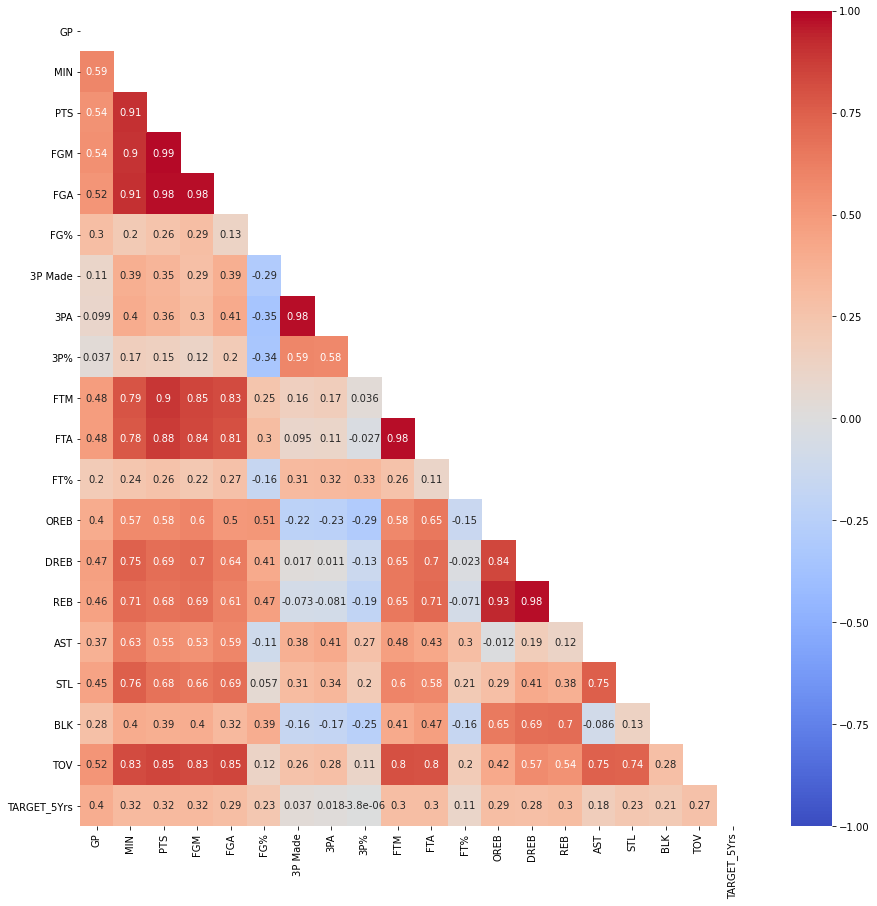

In [238]:
#correlation table to drop unimportant columns
plt.figure(figsize=(15,15))
msk = np.triu(nba_df.corr())
sns.heatmap(nba_df.corr(),mask= msk,  annot=True, cmap = 'coolwarm', vmin = -1, vmax =1, )

> HANDLING OUTLIERS

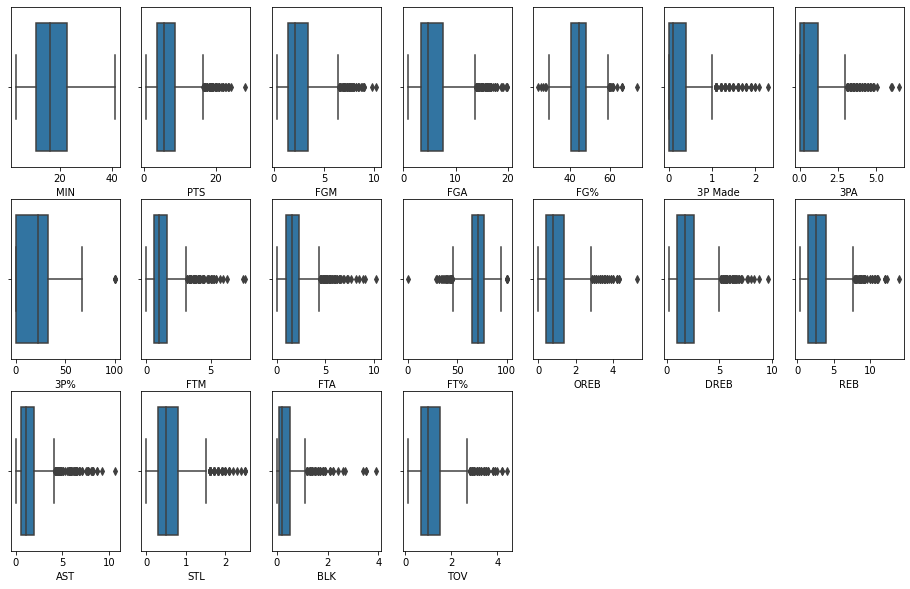

In [239]:
plt.figure(figsize=(16,10))
n= features_df.shape[1]
for i in range(1,n):
    plt.subplot(3,7,i)
    sns.boxplot(features_df.iloc[:,i])
plt.show()

In [240]:
# Handling Outliers by Capping.
for i in features_df.columns:
    rem_outlier(i)

In [241]:
# Handling Outliers by Transformation.
features_df.iloc[:,6:9] = features_df.iloc[:,6:9]**(1/2)
features_df["OREB"] = features_df["OREB"]**(1/2)
features_df["STL"] = features_df["STL"]**(1/2)
features_df["TOV"] = features_df["TOV"]**(1/3)
features_df["AST"] = features_df["TOV"]**(1/3)
features_df["BLK"] = features_df["TOV"]**(1/3)
features_df.iloc[:,9:11] = features_df.iloc[:,9:11]**(1/3)


features_df["FT%"] = features_df["FT%"]**2

features_df.iloc[:,2:5] = np.log10(features_df.iloc[:,2:5])
features_df["DREB"] = np.log10(features_df["DREB"])
features_df["REB"] = np.log10(features_df["REB"])

In [242]:
nba_df.describe().T

,count,mean,std,min,25%,50%,75%,max
GP,1340.0,60.414179,17.433992,11.00,47.000,63.00,77.0,82.00
MIN,1340.0,17.624627,8.307964,3.10,10.875,16.10,22.9,40.90
PTS,1340.0,6.669925,3.973602,0.70,3.700,5.55,8.8,16.45
FGM,1340.0,2.582313,1.547903,0.30,1.400,2.10,3.4,6.40
FGA,1340.0,5.786642,3.318715,0.80,3.300,4.80,7.5,13.80
FG%,1340.0,44.145485,6.000550,28.65,40.200,44.10,47.9,59.45
3P Made,1340.0,0.225522,0.315645,0.00,0.000,0.10,0.4,1.00
3PA,1340.0,0.730970,0.916444,0.00,0.000,0.30,1.2,3.00
3P%,1340.0,19.093657,15.800384,0.00,0.000,22.20,32.5,81.25
FTM,1340.0,1.236269,0.796687,0.00,0.600,1.00,1.6,3.10


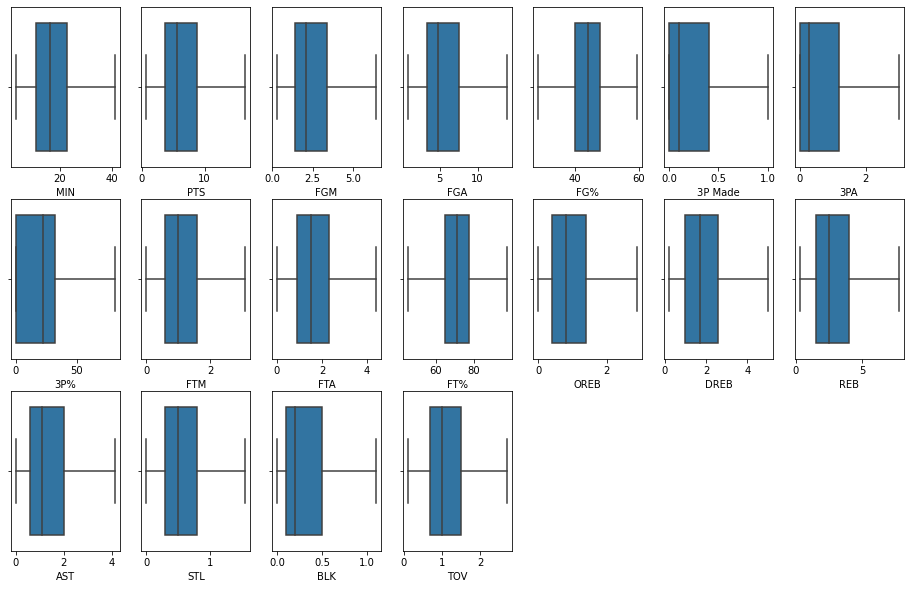

In [243]:
plt.figure(figsize=(16,10))
n= features_df.shape[1]
for i in range(1,n):
    plt.subplot(3,7,i)
    sns.boxplot(nba_df.iloc[:,i])
plt.show()

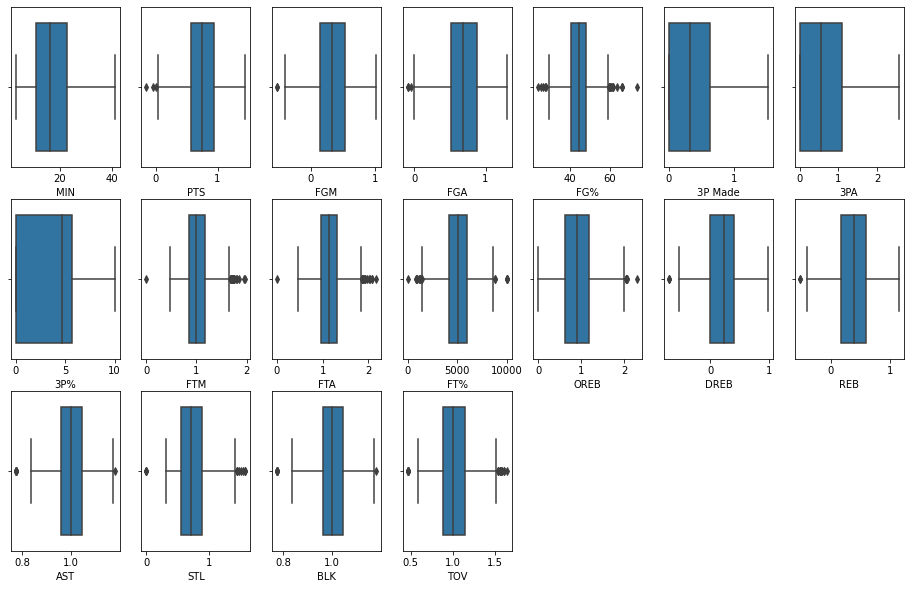

In [244]:
plt.figure(figsize=(16,10))
n= features_df.shape[1]
for i in range(1,n):
    plt.subplot(3,7,i)
    sns.boxplot(features_df.iloc[:,i])
plt.show()

In [245]:
# Evaluating Both the methods.

In [246]:
sc = StandardScaler()
features_tra= sc.fit_transform(features_df)
features_cap = sc.fit_transform(nba_df.drop("TARGET_5Yrs", axis =1))

In [247]:
lr = LogisticRegression()
scores_tra = cross_val_score(lr, features_tra , target_df, cv=5, scoring='accuracy')
scores_cap = cross_val_score(lr, features_cap , target_df, cv=5, scoring='accuracy')

In [248]:
print(scores_cap.mean())
print(scores_cap.std())

0.6880597014925373
0.02144792218388047


In [249]:
print(scores_tra.mean())
print(scores_tra.std())

0.6970149253731343
0.020627276061321254


In [250]:
# Selecting the transformation for handling Outliers.
features_df = pd.DataFrame(data=features_tra.copy(), columns= features_df.columns)


> Iteration: PCA

In [251]:
pca = PCA()
pca.fit(features_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Variance Explained')

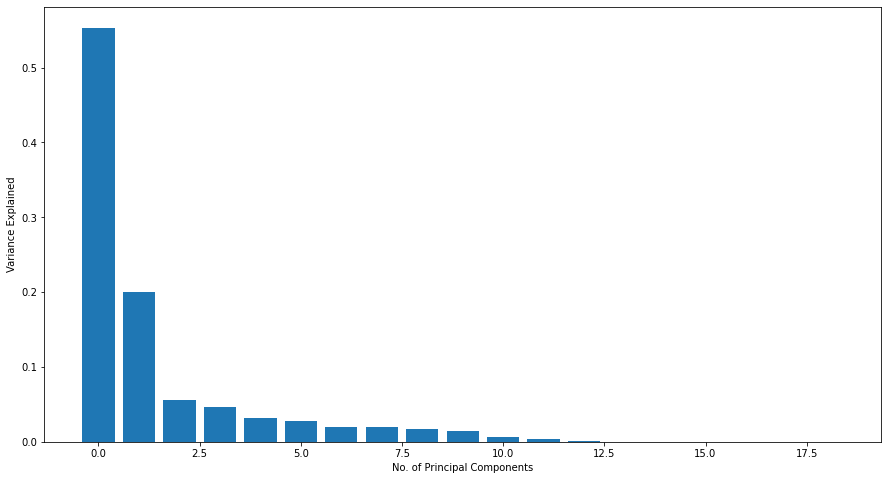

In [252]:
var_exp = pca.explained_variance_ratio_
cumu = np.cumsum(var_exp)
plt.figure(figsize=(15,8))
plt.bar(x=range(0,len(var_exp)), height= var_exp)
plt.xlabel("No. of Principal Components")
plt.ylabel("Variance Explained")

Text(0, 0.5, 'Cumulative Variance')

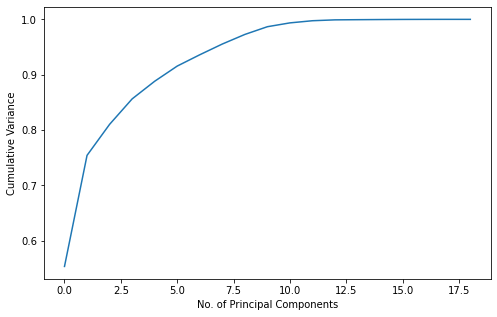

In [253]:
plt.figure(figsize=(8,5))
plt.plot(cumu)
plt.xlabel("No. of Principal Components")
plt.ylabel("Cumulative Variance")

In [254]:
pc = PCA(n_components=0.95)
vals = pc.fit_transform(features_df)
pca_df = pd.DataFrame(data=vals)

In [255]:
pca_df.sample(8)

,0,1,2,3,4,5,6,7
802,4.025457,-2.454350,0.537647,0.533828,-0.402923,-0.540446,-0.623872,0.199597
328,-0.392911,-2.667934,-0.347430,1.071418,-0.228113,-0.595148,0.408666,0.454283
685,0.524485,-2.902190,0.971188,-0.738778,-0.377615,0.341773,-0.375194,-0.338323
542,4.855347,0.583804,0.949456,0.670544,0.370786,-0.684989,-0.151197,0.006474
284,-1.268618,-2.022531,-0.617078,1.593530,1.009390,-0.740957,-0.462830,1.002579
148,1.893054,-1.230194,0.743369,-0.754690,-0.848944,1.124688,0.393059,-1.274643
157,1.806487,-0.233312,-0.435510,-1.920605,-0.214450,0.311349,0.147753,1.156964
1110,0.292981,-1.059993,0.698548,-1.723744,1.087753,1.825622,1.004435,-0.307841


In [256]:
# Evaluation of PCA.

In [257]:
# spliting the features data into train and test

X_train, X_test, y_train, y_test = train_test_split(pca_df, target_df, test_size=0.25, stratify = target_df, random_state=10)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
y_predict = lr.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.7243781094527363
0.7044776119402985
[[ 55  72]
 [ 27 181]]
              precision    recall  f1-score   support

         0.0       0.67      0.43      0.53       127
         1.0       0.72      0.87      0.79       208

    accuracy                           0.70       335
   macro avg       0.69      0.65      0.66       335
weighted avg       0.70      0.70      0.69       335



> Iteration : POLYNOMIAL FEATURE GENEARTION

In [258]:
from sklearn.preprocessing import PolynomialFeatures

In [259]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
features_poly = poly.fit_transform(features_df)

In [260]:
# Feature Selection

In [261]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [262]:
lr = LogisticRegression(max_iter=500)
sqf = SequentialFeatureSelector(lr, k_features=30, scoring='accuracy', cv=5, n_jobs=-1)
sqf.fit(features_poly, target_df)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=LogisticRegression(C=1.0, class_weight=None,
                                                       dual=False,
                                                       fit_intercept=True,
                                                       intercept_scaling=1,
                                                       l1_ratio=None,
                                                       max_iter=500,
                                                       multi_class='auto',
                                                       n_jobs=None,
                                                       penalty='l2',
                                                       random_state=None,
                                                       solver='lbfgs',
                                                       tol=0.0001, verbose=0,
                                                       warm_start=False),

In [263]:
sqf.get_metric_dict()

{1: {'feature_idx': (1,),
  'cv_scores': array([0.6641791 , 0.71268657, 0.73507463, 0.67164179, 0.65298507]),
  'avg_score': 0.6873134328358209,
  'feature_names': ('1',),
  'ci_bound': 0.04017088826595569,
  'std_dev': 0.03125431580801776,
  'std_err': 0.01562715790400888},
 2: {'feature_idx': (1, 10),
  'cv_scores': array([0.66044776, 0.7238806 , 0.75373134, 0.69402985, 0.67910448]),
  'avg_score': 0.7022388059701492,
  'feature_names': ('1', '10'),
  'ci_bound': 0.04250767801491322,
  'std_dev': 0.03307241762113483,
  'std_err': 0.016536208810567412},
 3: {'feature_idx': (1, 10, 15),
  'cv_scores': array([0.68283582, 0.72761194, 0.75      , 0.70149254, 0.69029851]),
  'avg_score': 0.7104477611940299,
  'feature_names': ('1', '10', '15'),
  'ci_bound': 0.032042673003675415,
  'std_dev': 0.024930288191776204,
  'std_err': 0.012465144095888102},
 4: {'feature_idx': (1, 10, 15, 74),
  'cv_scores': array([0.69402985, 0.73134328, 0.75      , 0.69029851, 0.69402985]),
  'avg_score': 0.7119

<Figure size 3600x1440 with 0 Axes>

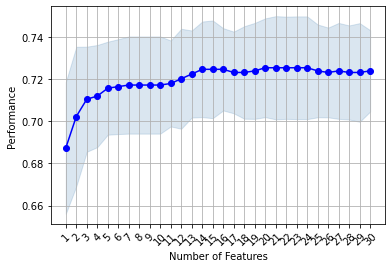

In [264]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
plt.figure(figsize=(50,20))
fig = plot_sfs(sqf.get_metric_dict())
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [273]:
# selecting Number of features as 16
cols = list(sqf.get_metric_dict()[16]['feature_idx'])
df = pd.DataFrame()
for c in cols:
    df[c] = features_poly[:,c]

In [278]:
X_train, X_test, y_train, y_test = train_test_split(df, target_df, test_size=0.3, stratify = target_df, random_state=10)
lr = LogisticRegression(max_iter=400)
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
y_predict = lr.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.7270788912579957
0.7064676616915423
[[ 72  81]
 [ 37 212]]
              precision    recall  f1-score   support

         0.0       0.66      0.47      0.55       153
         1.0       0.72      0.85      0.78       249

    accuracy                           0.71       402
   macro avg       0.69      0.66      0.67       402
weighted avg       0.70      0.71      0.69       402



In [277]:
scores = cross_val_score(lr, df , target_df, cv=5, scoring='accuracy')
print(scores.mean())
print(scores.std())

0.7246268656716418
0.019517457956152277


In [279]:
scores = cross_val_score(lr, df , target_df, cv=5, scoring='f1')
print(scores.mean())
print(scores.std())

0.7906266310326616
0.014407068221473734


In [280]:
scores = cross_val_score(lr, df , target_df, cv=5, scoring='precision')
print(scores.mean())
print(scores.std())

0.7489695489695489
0.02383770834265925


In [281]:
scores = cross_val_score(lr, df , target_df, cv=5, scoring='recall')
print(scores.mean())
print(scores.std())

0.8387562224947696
0.0330415062858614


In [289]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=3, random_state=10)
bg = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=10),n_estimators=50, random_state=10)
rf = RandomForestClassifier(random_state=10)
gb = GradientBoostingClassifier(random_state=10)
sv = SVC(C=0.8,gamma='auto', random_state=10)

models  = [dt, bg, rf, gb, sv]

In [290]:
for mdl in models:
    scores = cross_val_score(mdl, df , target_df, cv=5, scoring='accuracy')
    print(mdl)
    print('Bias error:',scores.mean())
    print('Variance error:',scores.std())
    print('\n')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')
Bias error: 0.5820895522388059
Variance error: 0.03452248807826981


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min